In [2]:
import swirlpy
import numpy as np
from pyevtk.hl import gridToVTK 
from pyevtk.hl import pointsToVTK

In [3]:
#Load CO5BOLD Data

N = 960
xi = 0
yi = 0
zi = 93
zf = 223

t = 5774
    
box = swirlpy.Box(xi=[xi,yi,zi], xf=[xi+N,yi+N,zf+1],boundary=[0,0,0])
box.read(t, 
         '/home/cluster/jcaniv/shares/job3D960x960x280_v50_superhighcad/COBOLD_sim', 
         ['v','B','Pre','tau', 'rho'])

v Loaded!
B Loaded!
Pre Loaded!
tau Loaded!
rho Loaded!


In [6]:
### t = 5774

# vortexdata = np.load('../Test_Statistics/newdata/structures3D_all_t5774.npy', allow_pickle=True)

# vortex = np.vstack(vortexdata)

# x = np.asfortranarray(vortex[:,0]*10.)
# y = np.asfortranarray(vortex[:,1]*10.)
# z = np.asfortranarray(vortex[:,2]*10.)-300.

# radius = np.asfortranarray(vortex[:,3]*10.)
# rortex = np.asfortranarray(vortex[:,4])
# Sv = np.asfortranarray(vortex[:,9])
# Sh = np.asfortranarray(vortex[:,11])
# MSz = np.asfortranarray(vortex[:,15])
# Bz = np.asfortranarray(vortex[:,13])

#pointsToVTK("/home/cluster/jcaniv/shares/job3D960x960x280_v50_superhighcad/COBOLD_sim/VTS/Vortexdata_new_"+str(t), x, y, z, data={"radius":radius, "rortex":rortex, "Sv":Sv, "Sh":Sh, "MSz":MSz, "Bz":Bz, "x":x, "y":y, "z":z})

In [5]:
vortexdata = np.load('../Test_Statistics/newdata/structures3D_all_t5774.npy', allow_pickle=True)

vortex = np.vstack(vortexdata)


x = np.array(vortex[:,0], dtype=int)
y = np.array(vortex[:,1], dtype=int)
z = np.array(vortex[:,2], dtype=int)
radius = np.array(vortex[:,3], dtype=int)
rortex = np.array(vortex[:,4])

vortices = np.zeros((N, N, zf-zi+1))

for i,j,k,r,R in zip(x,y,z,radius,rortex):
    vortices[i,j,k] = R
    xx,yy = np.meshgrid(np.arange(0,N),np.arange(0,N))
    xx = xx.T
    yy = yy.T
    mask = np.where((xx-i)**2 + (yy-j)**2 <= r**2)
    #mask = np.where((xx-i)**2 + (yy-j)**2 <= r)
    mask2 = (mask[0], mask[1], np.array(k*np.ones((mask[0].shape[0])), dtype=int))
    vortices[mask2] = R
    if k-1 >= 0:
        mask2 = (mask[0], mask[1], np.array((k-1)*np.ones((mask[0].shape[0])), dtype=int))
        vortices[mask2] = R
    if k+1 < zf-zi+1:
        mask2 = (mask[0], mask[1], np.array((k+1)*np.ones((mask[0].shape[0])), dtype=int))
        vortices[mask2] = R
    
# vortices_large = np.zeros((N, N, zf-zi+1))

# for i,j,k,r,R in zip(x,y,z,radius,rortex):
#     vortices[i,j,k] = R
#     xx,yy = np.meshgrid(np.arange(0,N),np.arange(0,N))
#     xx = xx.T
#     yy = yy.T
#     mask = np.where((xx-i)**2 + (yy-j)**2 <= 3*r**2)
#     #mask = np.where((xx-i)**2 + (yy-j)**2 <= r)
#     mask2 = (mask[0], mask[1], np.array(k*np.ones((mask[0].shape[0])), dtype=int))
#     vortices_large[mask2] = R
#     if k >= 0:
#         mask2 = (mask[0], mask[1], np.array((k-1)*np.ones((mask[0].shape[0])), dtype=int))
#         vortices_large[mask2] = R
#     if k+1 < zf-zi+1:
#         mask2 = (mask[0], mask[1], np.array((k+1)*np.ones((mask[0].shape[0])), dtype=int))
#         vortices_large[mask2] = R

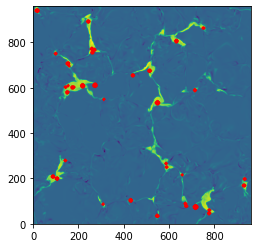

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(np.where(np.abs(vortices[:,:,35].T) > 0.001)[1],np.where(np.abs(vortices[:,:,35].T) > 0.001)[0], color='red', s=0.1)

plt.imshow(box.B.z[:,:,35].T, origin='lower')

In [51]:
[x,y,z] = box.v.x.shape

vortices = np.asfortranarray(vortices)

xx = np.arange(x)*10.
yy = np.arange(y)*10.
zz = np.arange(z)*10.-300.
x,y,z = np.meshgrid(xx,yy,zz, indexing='ij')

gridToVTK("/home/cluster/jcaniv/shares/job3D960x960x280_v50_superhighcad/COBOLD_sim/VTS/vortices3D_"+str(t), x, y, z, pointData = {"3DRortex":vortices})

'/home/cluster/jcaniv/shares/job3D960x960x280_v50_superhighcad/COBOLD_sim/VTS/vortices3D_5760.vts'

In [4]:
vortexdata = np.load('../Test_Statistics/structures3D_t5760.npy', allow_pickle=True)

[x,y,z] = box.v.x.shape

vortices = np.zeros((x,y,z))

for structure3D in vortexdata:
    for i,j,k,r in zip(structure3D[:,0],structure3D[:,1],structure3D[:,2],structure3D[:,3]):
        vortices[int(i),int(j),int(k)] = r
        
vortices = np.asfortranarray(vortices)

In [27]:
"""
from pyevtk.hl import pointsToVTK
import numpy as np

# Example 1
npoints = 100
x = np.random.rand(npoints)
y = np.random.rand(npoints)
z = np.random.rand(npoints)
pressure = np.random.rand(npoints)
temp = np.random.rand(npoints)
pointsToVTK("./rnd_points", x, y, z, data={"temp": temp, "pressure": pressure})

# Example 2
x = np.arange(1.0, 10.0, 0.1)
y = np.arange(1.0, 10.0, 0.1)
z = np.arange(1.0, 10.0, 0.1)
pointsToVTK("./line_points", x, y, z, data={"elev": z})
"""

'\nfrom pyevtk.hl import pointsToVTK\nimport numpy as np\n\n# Example 1\nnpoints = 100\nx = np.random.rand(npoints)\ny = np.random.rand(npoints)\nz = np.random.rand(npoints)\npressure = np.random.rand(npoints)\ntemp = np.random.rand(npoints)\npointsToVTK("./rnd_points", x, y, z, data={"temp": temp, "pressure": pressure})\n\n# Example 2\nx = np.arange(1.0, 10.0, 0.1)\ny = np.arange(1.0, 10.0, 0.1)\nz = np.arange(1.0, 10.0, 0.1)\npointsToVTK("./line_points", x, y, z, data={"elev": z})\n'

In [5]:
boxv = swirlpy.Box(xi=[xi,yi,zi], xf=[xi+N,yi+N,zf+1],boundary=[1,1,1])
boxv.read(t, 
         '/home/cluster/jcaniv/bulk/job3D960x960x280_v50_superhighcad/COBOLD_sim', 
         ['v'])

swirl = swirlpy.Swirl(boxv)
swirl.compute_swirl()

vorticity = swirlpy.Vort(boxv)
vorticity.compute_vort()

v Loaded!



===    Compute Swirling strength
===    dz = 133
===     Finish
===     Time elapsed: 11 m, 47.77999999999997 s



===     Compute vorticity strength
===     Finish
===     Time elapsed: 3.57 s


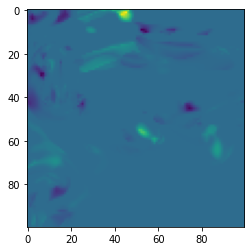

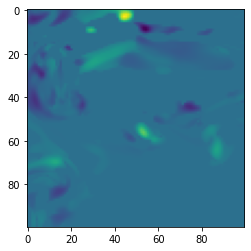

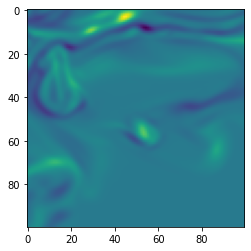

In [10]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(R[:100,:100,30])

plt.figure()
plt.imshow(swirl.z[:100,:100,30])

plt.figure()
plt.imshow(vorticity.z[:100,:100,30])

In [6]:
R1 = vorticity.z**2 - swirl.z**2
mask = R1 < 0.0
R1[mask] = 0.0

signR = np.sign(swirl.z)
# compute rortex

R2 = np.abs( np.abs(vorticity.z) - np.abs(np.sqrt(R1)) )
R = R2*signR

[x,y,z] = box.v.x.shape
Rortex = np.zeros((x,y,z))
Rortex[1:-1,1:-1,1:-1] = R

ValueError: could not broadcast input array from shape (960,960,131) into shape (958,958,129)

In [10]:
# Prepare arrays

[x,y,z] = box.v.x.shape


vx = np.asfortranarray(box.v.x)
vy = np.asfortranarray(box.v.y)
vz = np.asfortranarray(box.v.z)

Bx = np.asfortranarray(box.B.x)
By = np.asfortranarray(box.B.y)
Bz = np.asfortranarray(box.B.z)

#R = np.asfortranarray(R)

tau1 = np.asfortranarray(box.tau.s)
Pre = np.asfortranarray(box.Pre.s)

beta = Pre/(Bx**2 + By**2 + Bz**2)*4*np.pi*2

vortices = np.asfortranarray(vortices)

xx = np.arange(x)*10.
yy = np.arange(y)*10.
zz = np.arange(z)*10.-300.
x,y,z = np.meshgrid(xx,yy,zz, indexing='ij')

gridToVTK("/home/cluster/jcaniv/shares/job3D960x960x280_v50_superhighcad/COBOLD_sim/VTS/CO5BOLDdata_"+str(t), x, y, z, pointData = {"beta":beta, "tau":tau1, "vx" : vx,"vy" : vy, "vz" : vz, "Bx" : Bx,"By" : By, "Bz" : Bz, "vortices": vortices})

'/home/cluster/jcaniv/shares/job3D960x960x280_v50_superhighcad/COBOLD_sim/VTS/CO5BOLDdata_5774.vts'

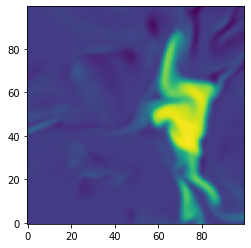

In [17]:
import matplotlib.pyplot as plt
#plt.imshow(box.B.z[50:150, 150:250, 30].T, origin='lower')
plt.imshow(box.B.z[860:960, 120:220, 30].T, origin='lower')

In [16]:
# Prepare arrays

[x,y,z] = [100,100,130]


vx = np.asfortranarray(box.v.x[50:150,150:250,:])
vy = np.asfortranarray(box.v.y[50:150,150:250,:])
vz = np.asfortranarray(box.v.z[50:150,150:250,:])

Bx = np.asfortranarray(box.B.x[50:150,150:250,:])
By = np.asfortranarray(box.B.y[50:150,150:250,:])
Bz = np.asfortranarray(box.B.z[50:150,150:250,:])

#R = np.asfortranarray(R)

tau1 = np.asfortranarray(box.tau.s[50:150,150:250,:])
Pre = np.asfortranarray(box.Pre.s[50:150,150:250,:])

beta = Pre/(Bx**2 + By**2 + Bz**2)*4*np.pi*2

vorticesf = np.asfortranarray(vortices[50:150,150:250,:])

xx = (np.arange(x)+50)*10.
yy = (np.arange(y)+150)*10.
zz = np.arange(z)*10.-300.
x,y,z = np.meshgrid(xx,yy,zz, indexing='ij')

gridToVTK("/home/cluster/jcaniv/shares/job3D960x960x280_v50_superhighcad/COBOLD_sim/VTS/VortexA_data_"+str(t), x, y, z, pointData = {"beta":beta, "tau":tau1, "vx" : vx,"vy" : vy, "vz" : vz, "Bx" : Bx,"By" : By, "Bz" : Bz, "vortices": vorticesf})

'/home/cluster/jcaniv/shares/job3D960x960x280_v50_superhighcad/COBOLD_sim/VTS/VortexA_data_5774.vts'

In [24]:
# Prepare arrays

[x,y,z] = [100,100,130]


vx = np.asfortranarray(box.v.x[860:960, 120:220,:])
vy = np.asfortranarray(box.v.y[860:960, 120:220,:])
vz = np.asfortranarray(box.v.z[860:960, 120:220,:])

Bx = np.asfortranarray(box.B.x[860:960, 120:220,:])
By = np.asfortranarray(box.B.y[860:960, 120:220,:])
Bz = np.asfortranarray(box.B.z[860:960, 120:220,:])

#R = np.asfortranarray(R)

tau1 = np.asfortranarray(box.tau.s[860:960, 120:220,:])
Pre = np.asfortranarray(box.Pre.s[860:960, 120:220,:])

beta = Pre/(Bx**2 + By**2 + Bz**2)*4*np.pi*2

vorticesf = np.asfortranarray(vortices[860:960, 120:220,:])

xx = (np.arange(x)+860)*10.
yy = (np.arange(y)+120)*10.
zz = np.arange(z)*10.-300.
x,y,z = np.meshgrid(xx,yy,zz, indexing='ij')

gridToVTK("/home/cluster/jcaniv/shares/job3D960x960x280_v50_superhighcad/COBOLD_sim/VTS/VortexB_data_"+str(t), x, y, z, pointData = {"beta":beta, "tau":tau1, "vx" : vx,"vy" : vy, "vz" : vz, "Bx" : Bx,"By" : By, "Bz" : Bz, "vortices": vorticesf})

'/home/cluster/jcaniv/shares/job3D960x960x280_v50_superhighcad/COBOLD_sim/VTS/VortexB_data_5774.vts'

In [7]:
import matplotlib.pyplot as plt

Bz = box.B.z[860:960, 120:220, :]
By = box.B.y[860:960, 120:220, :]
Bx = box.B.x[860:960, 120:220, :]
P = box.Pre.s[860:960, 120:220,:]
rho = box.rho.s[860:960, 120:220,:]
v = vortices[860:960, 120:220,:]
Pm = (Bz**2 + By**2 + Bx**2)/(8*np.pi)
Ptot = Pm + P
vA = np.sqrt(2*Pm/rho)

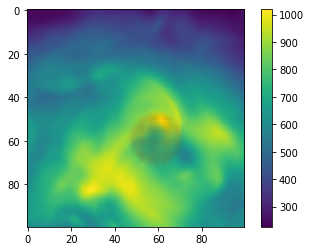

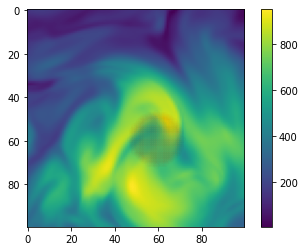

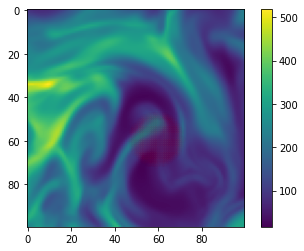

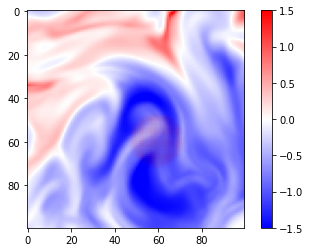

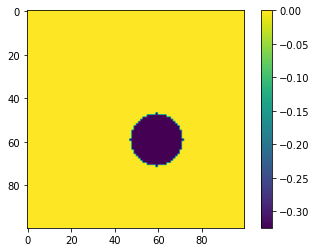

In [18]:
plt.figure()
plt.imshow(Ptot[:,:,100])
plt.colorbar()
plt.scatter(np.where(v[:,:,100]<0.0)[0], np.where(v[:,:,100]<0.0)[1], alpha=.01, color='red')

plt.figure()
plt.imshow(Pm[:,:,100])
plt.colorbar()
plt.scatter(np.where(v[:,:,100]<0.0)[0], np.where(v[:,:,100]<0.0)[1], alpha=.01, color='red')

plt.figure()
plt.imshow(P[:,:,100])
plt.colorbar()
plt.scatter(np.where(v[:,:,100]<0.0)[0], np.where(v[:,:,100]<0.0)[1], alpha=.01, color='red')

plt.figure()
plt.imshow(np.log10((P/Pm))[:,:,100], cmap='bwr', vmax=1.5, vmin=-1.5)
plt.colorbar()
plt.scatter(np.where(v[:,:,100]<0.0)[0], np.where(v[:,:,100]<0.0)[1], alpha=.01, color='red')

plt.figure()
plt.imshow(v[:,:,100])
plt.colorbar()

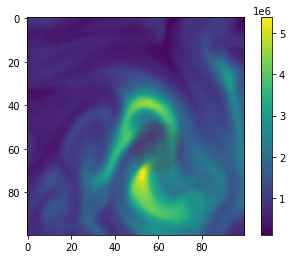

In [19]:
plt.figure()
plt.imshow(vA[:,:,100])
plt.colorbar()

plt.scatter(np.where(v[:,:,100]<0.0)[0], np.where(v[:,:,100]<0.0)[1], alpha=.01, color='red')